

## Project Outline

- We're going to scrape the covid statistics from https://epidemic-stats.com/
- We will get a list of infected,deaths,recovered stats country wise
- We will create a CSV file in the following format:    

```
country,infected,deaths,recovered,death_percent,recovered_percent
USA,35688506,629064,29652038,1.8,83.1
India,31613993,423842,30781263,1.3,97.4
```

**Importing requests library**

*  documentation :  [requests](https://docs.python-requests.org/en/master/)


In [1]:
import requests

In [2]:
covid_stats = 'https://epidemic-stats.com/'

**Lets fetch the repsonse from the website**

In [3]:
response = requests.get(covid_stats)

Check the status code: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [4]:
response.status_code

200

200 means the response was successful .

In [5]:
len(response.text)

1395508

the character length of the response.text i.e html doc is 1292842

In [6]:
page_contents = response.text

Display the first 500 chars contents of html doc . We wont print the whole content because it is too large !! to display 

In [7]:
page_contents[:500]

'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="keywords"\n          content="epidemic, pandemic, coronavirus, COVID-19, covid, 19, 2019-nCoV, SARS-nCOV2, news, live, realtime, stats, statistics, charts, diagrams, countires">\n\n    \n    <meta name="description"\n          content="Monitoring of epidemic. Real-time coronavirus statistics. Live COVID-19 stats with charts for many countries."'

**Importing the BeautifulSoup Library**
* doc : https://beautiful-soup-4.readthedocs.io/en/latest/

In [8]:
from bs4 import BeautifulSoup

**Parse the page contents to beautifulsoup constructer**

In [9]:
doc = BeautifulSoup(page_contents,'html.parser')

**Extracting Country names**

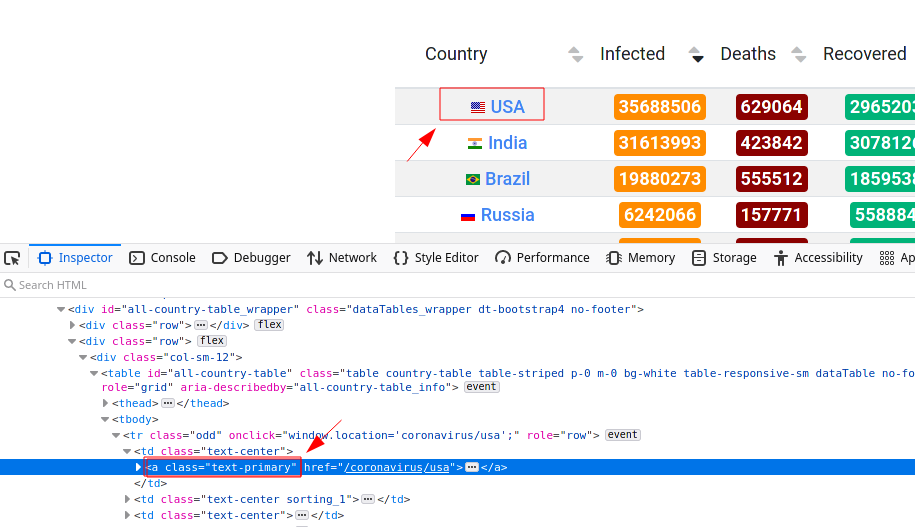

We want to scrape the Country Column from the site .So lets inspect it.


*   We find that Usa element has a class of "text-primary" and it is embedded in anchor tag.
*   So we need to find all the countries which belong to the same class ("text-primary") and it is inside of anchor tag of html.
*  We find it by using find_all function and pass in the "a" char and class attribute to find all the matching patterns from the html doc.



In [10]:
country_selection = 'text-primary'
countries_a_tag = doc.find_all("a",{'class':country_selection})
len(countries_a_tag)                


211

* There are 210 matches from the doc i.e there are 210 countries 

*   Lets display the first 5  matching list of strings



In [11]:
countries_a_tag[:5]

[<a class="text-primary" href="/coronavirus/usa">
 <img src="https://www.countryflags.io/US/flat/16.png"/>
                     USA</a>,
 <a class="text-primary" href="/coronavirus/india">
 <img src="https://www.countryflags.io/IN/flat/16.png"/>
                     India</a>,
 <a class="text-primary" href="/coronavirus/brazil">
 <img src="https://www.countryflags.io/BR/flat/16.png"/>
                     Brazil</a>,
 <a class="text-primary" href="/coronavirus/uk">
 <img src="https://www.countryflags.io/GB/flat/16.png"/>
                     UK</a>,
 <a class="text-primary" href="/coronavirus/russia">
 <img src="https://www.countryflags.io/RU/flat/16.png"/>
                     Russia</a>]

**Extracting Infected values**

Lets do the same with infected values from the doc , to fetch all the values which matches the class and span tag of the element 

In [12]:
infected_selection = 'infected-badges'

infected_span_tag = doc.find_all('span',{'class':infected_selection})
len(infected_span_tag)

211

not surprising that there are 210 values of infected since there are 210 countries

lets display the first five list of string values of infected from covid

In [13]:
infected_span_tag[:5]

[<span class="infected-badges">44447538</span>,
 <span class="infected-badges">33793443</span>,
 <span class="infected-badges">21445651</span>,
 <span class="infected-badges">7871014</span>,
 <span class="infected-badges">7560767</span>]

Now we have fetched the country names and infected , lets explore 

*   We dont want the whole tag , we just want the text inside the tag for eg : ```<a class="text-primary" href="/coronavirus/usa"> <img src="https://www.countryflags.io/US/flat/16.png"/>USA</a>```
 from this tag we would only want the text 'USA' inside the anchor tag and rest all stuff is unnecessary .
*  This can be done by using the 'text' method which returns the text inside the tag

* lets apply this text method on the first string from the country_a_tag list



In [14]:
countries_a_tag[0].text

'\n\n                    USA'

to remove whitespaces we can use strip method

In [15]:
countries_a_tag[0].text.strip()

'USA'

**Extracting deaths**
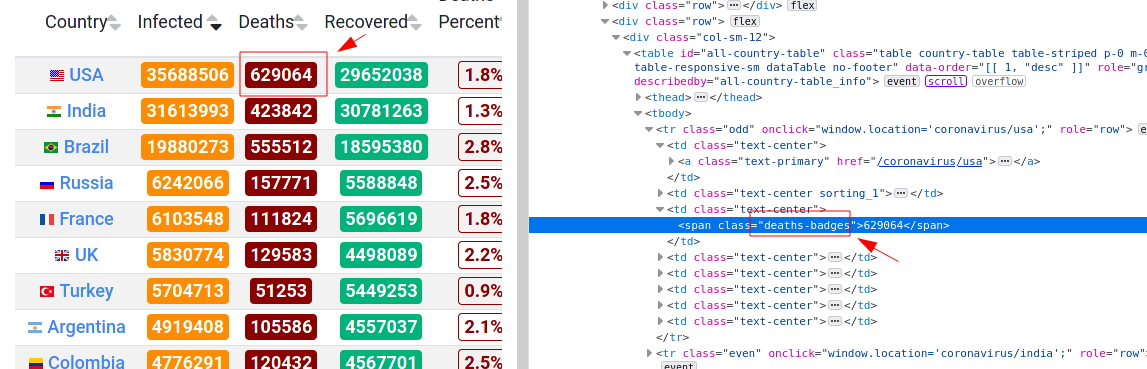

In [16]:
deaths_selection = 'deaths-badges'
death_span_tag = doc.find_all('span',{'class':deaths_selection})
len(death_span_tag)

211

No. of deaths in USA :

In [17]:
death_span_tag[0].text

'719037'

In [18]:
int(death_span_tag[0].text)

719037

**Extracting recovered values**

In [19]:
recovered_selection = 'recovered-badges'
recovered_span_tag = doc.find_all('span',{'class': recovered_selection})
len(recovered_span_tag)

211

In [20]:
recovered_span_tag[0].text.strip()

'33816494'

**Extracting Death percent values**

*  Death percent = (Deaths/Infected) * 100




In [21]:
death_percent_selection = 'deaths-badges-outline'
death_percent_span_tag = doc.find_all('span',{'class':death_percent_selection})
len(death_percent_span_tag)

211

In [22]:
death_percent_span_tag[0].text

'1.6%'



*   We dont need '%' character lets strip it.
*   Also convert the string to float



In [23]:
float(death_percent_span_tag[0].text.strip('%'))

1.6

**Extracting Recovered percent values**

*  Recovered percent = (Recovered/Infected) * 100

In [24]:
recovered_percent_selection = 'recovered-badges-outline'
recovered_percent_span_tag = doc.find_all('span',{'class':recovered_percent_selection})
len(recovered_percent_span_tag)

211

In [25]:
float(recovered_percent_span_tag[0].text.strip('%'))

76.1

Finally we have extracted all the values from the site 

*   Now,lets create a empty list.
*   Iterate through all the list of tags.
*   Extract the text from the list & if need strip,convert it into integer datatype.
* Append it to the empty list which will be used to create a dataframe from the list.



**Putting it all together**

In [26]:
country_name = []

for country in countries_a_tag:
  country_name.append(country.text.strip())

print(country_name[:10])

['USA', 'India', 'Brazil', 'UK', 'Russia', 'Turkey', 'France', 'Iran', 'Argentina', 'Spain']


In [27]:
infected = []

for inf in infected_span_tag:
  infected.append(int(inf.text))
print(infected[:10])

[44447538, 33793443, 21445651, 7871014, 7560767, 7182943, 7018367, 5611700, 5258466, 4961128]


In [28]:
deaths = []
for death in death_span_tag:
  deaths.append(int(death.text))
print(deaths[:10])

[719037, 448636, 597292, 136910, 209028, 64264, 116759, 120880, 115225, 86463]


In [29]:
recovered = []
for recover in recovered_span_tag:
  recovered.append(int(recover.text))
print(recovered[:10])

[33816494, 33068599, 20432643, 6387267, 6710574, 6642132, 6788312, 5075482, 5119953, 4755738]


In [30]:
death_percent = []
for dp in death_percent_span_tag:
  death_percent.append(float(dp.text.strip('%')))
print(death_percent[:10])

[1.6, 1.3, 2.8, 1.7, 2.8, 0.9, 1.7, 2.2, 2.2, 1.7]


In [31]:
recovered_percent=[]
for rp in recovered_percent_span_tag:
  recovered_percent.append(float(rp.text.strip('%')))
print(recovered_percent[:10])

[76.1, 97.9, 95.3, 81.1, 88.8, 92.5, 96.7, 90.4, 97.4, 95.9]


**Creating a Dataframe**


*   Import pandas library
*   Use lists in dictionary to create dataframe










In [32]:
import pandas as pd 

covid_dict ={
    'country':country_name,
    'infected':infected,
    'deaths':deaths,
    'recovered':recovered,
    'death_percent':death_percent,
    'recovered_percent':recovered_percent
}

covid_data = pd.DataFrame(covid_dict)
covid_data.head()

,country,infected,deaths,recovered,death_percent,recovered_percent
0,USA,44447538,719037,33816494,1.6,76.1
1,India,33793443,448636,33068599,1.3,97.9
2,Brazil,21445651,597292,20432643,2.8,95.3
3,UK,7871014,136910,6387267,1.7,81.1
4,Russia,7560767,209028,6710574,2.8,88.8


**Final Step : Generating CSV from dataframe**

In [33]:
covid_data.to_csv('covidData.csv',index=None)

I hope this mini scraping project helped you understand the basics of web scraping with Python. 